In [5]:
import matplotlib.pyplot as plt
from numpy import linspace, pi, array
import swarms

#### Plotting Dc vs Dmin keeping $\sigma_{tot}$ and $M_{tot}$ constant

Using eq.(4) from Kennedy & Wyatt 2011,
\begin{equation}
    \bigg(\frac{M_{tot}}{M_{moon}}\bigg) = 6.9 \times 10^{-8}\bigg(\frac{\rho}{kgm^{-3}}\bigg) \bigg(\frac{\sigma_{tot}}{\pi R_{jup}^2}\bigg) \bigg(\frac{D_c}{m}\bigg)^{0.9} \bigg(\frac{D_{min}}{m}\bigg)^{0.7} 
\end{equation}

The constrast ratio (CR) is given as,
\begin{equation}
    CR = \frac{F_{swarm}}{F_*^{d_{pl}}} = \frac{\sigma_{tot}gQ}{a_{pl}^2 \pi} = \frac{\sigma_{0}gQ}{a_{pl}^2 \pi} G(t)
\end{equation}

Using the same eq.(4) to get the CR with respect to the swarm mass,
\begin{equation}
    CR = 1.43 \times 10^5 \frac{ \bigg(\frac{M_{tot}}{M_{moon}}\bigg) \bigg(\frac{g}{0.31}\bigg) \bigg(\frac{Q}{0.1}\bigg) }{ \bigg(\frac{D_c}{m}\bigg)^{0.9} \bigg(\frac{D_{min}}{m}\bigg)^{0.7} \bigg(\frac{a_{pl}}{\pi R_{jup}}\bigg)^2 \bigg(\frac{\rho}{kgm^{-3}}\bigg) }
\end{equation}

$D_{min}$ is given by eq.(9) from Kennedy & Wyatt 2011. If we assume $L_* \propto M_*^4$,
\begin{equation}
    \bigg(\frac{D_{min}}{\mu m}\bigg) = 2.07 \times 10^4 \bigg(\frac{M_*}{M_{\odot}}\bigg)^{10/3} \bigg(\frac{\rho}{kgm^{-3}}\bigg)^{-1} \bigg(\frac{\eta}{0.5}\bigg)^{1/2} \bigg(\frac{M_{pl}}{M_{jup}}\bigg)^{-1/3}
\end{equation}

We can write CR as,
\begin{equation}
    CR = 4.93 \times 10^{-1} \frac{ \bigg(\frac{M_{pl}}{M_{jup}}\bigg)^{7/30} \bigg(\frac{M_{tot}}{M_{moon}}\bigg) \bigg(\frac{g}{0.32}\bigg) \bigg(\frac{Q}{0.1}\bigg) }{ \bigg( \frac{D_c}{m} \bigg)^{0.9} \bigg(\frac{M_*}{M_{\odot}}\bigg)^{7/3} \bigg(\frac{\eta}{0.5}\bigg)^{7/20} \bigg(\frac{a_{pl}}{AU}\bigg)^2 \bigg(\frac{\rho}{kgm^{-3}}\bigg)^{3/10} }
\end{equation}

Start with the rate of catastrophic collisions from eq.(7) in Kennedy,
\begin{equation}
        \bigg(\frac{R_{cc}}{yr^{-1}}\bigg) = 1.3 \times 10^7 \frac{\bigg(\frac{M_*}{M_{\odot}}\bigg)^{1.38}f_{v_{rel}}^{2.27}\bigg(\frac{M_{tot}}{M_{\oplus}}\bigg)}{\bigg(\frac{Q_D^*}{Jkg^{-1}}\bigg)^{0.63}\bigg(\frac{\rho}{kgm^{-3}}\bigg) \bigg(\frac{D_c}{km}\bigg) \bigg(\eta \bigg(\frac{a_{pl}}{au^2}\bigg)\bigg)^{4.13} \bigg(\frac{M_{pl}}{M_{\oplus}}\bigg)^{0.24}}
\end{equation}

From eq.(2) in Kennedy,
\begin{equation}
    \bigg(\frac{Q_D^*}{Jkg^{-1}}\bigg) = 0.1 \frac{1}{f_Q} \bigg(\frac{\rho}{kgm^{-3}}\bigg) \bigg(\frac{D_c}{km}\bigg)^{1.26}
\end{equation}

Thus taking $f_{v_{rel}} = 4/\pi$ and $f_Q = 5$, 
\begin{equation}
    \bigg(\frac{R_{cc}}{yr^{-1}}\bigg) = 1.917 \times 10^{11} \frac{ \bigg(\frac{M_*}{M_{\odot}}\bigg)^{1.38} \bigg(\frac{M_{tot}}{M_{moon}}\bigg) }{ \bigg(\frac{\rho}{kgm^{-3}}\bigg)^{1.63} \bigg(\frac{D_c}{m}\bigg)^{1.79} \eta^{4.13} \bigg(\frac{a_{pl}}{au^2}\bigg)^{4.13} \bigg(\frac{M_{pl}}{M_{jup}}\bigg)^{0.24} }
\end{equation}

In [6]:
Mmoon = 7.34767309e22
Mjup = 1.898e27
Rjup = 7.1492e7
AU = 1.496e11
Mearth = 5.972e24

# Fix different M_tot
Mtot100 = 100
Mtot10 = 10
Mtot1 = 1

# Fix different sigma_tot
sigma_tot6 = 1e-6 * AU**2 / Rjup**2
sigma_tot7 = 1e-7 * AU**2 / Rjup**2
sigma_tot8 = 1e-8 * AU**2 / Rjup**2

# Fix different Dmin
Dmin0165 = 1.65 * 1e-6
Dmin0500 = 5.00 * 1e-6
Dmin1200 = 12.00 * 1e-6
Dmin2300 = 23.00 * 1e-6

rho = 1500
Dc = linspace(1e4, 1e7, 500)
Dmin = linspace(1.65 * 1e-6, 23 * 1e-6, 500)

In [7]:
# sig in Rjup^2
# M in Mmoon
# rest in SI
def dmin_to_dc(M, rho, sig, dmin):
    return (6.9e-8 * rho * sig * dmin**0.7 / M)**(-0.9)

def dc_to_sig(M, rho, dc, dmin):
    return M / (6.9e-8 * rho * dc**0.9 * dmin**0.7)

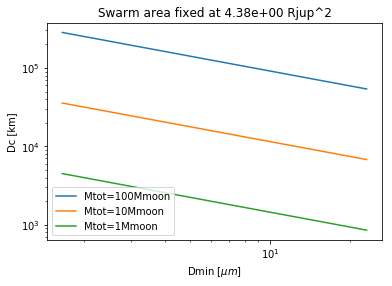

In [8]:
Dc100 = []
Dc10 = []
Dc1 = []
for i in range(len(Dmin)):
    Dc100.append(dmin_to_dc(Mtot100, rho, sigma_tot6, Dmin[i]) / 1000)
    Dc10.append(dmin_to_dc(Mtot10, rho, sigma_tot6, Dmin[i]) / 1000)
    Dc1.append(dmin_to_dc(Mtot1, rho, sigma_tot6, Dmin[i]) / 1000)

plt.figure(1)
plt.loglog(Dmin / 1e-6, Dc100, label="Mtot=100Mmoon")
plt.loglog(Dmin / 1e-6, Dc10, label="Mtot=10Mmoon")
plt.loglog(Dmin / 1e-6, Dc1, label="Mtot=1Mmoon")
plt.xlabel(r"Dmin $[\mu m]$")
plt.ylabel("Dc [km]")
plt.title("Swarm area fixed at {0:.2e}".format(sigma_tot6)+" Rjup^2")
plt.legend()
plt.show()

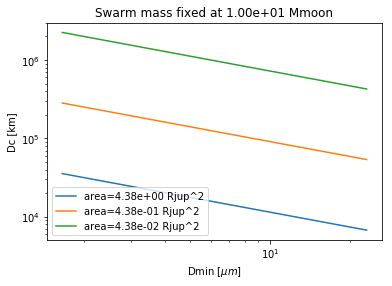

In [9]:
Dc6 = []
Dc7 = []
Dc8 = []
for i in range(len(Dmin)):
    Dc6.append(dmin_to_dc(Mtot10, rho, sigma_tot6, Dmin[i]) / 1000)
    Dc7.append(dmin_to_dc(Mtot10, rho, sigma_tot7, Dmin[i]) / 1000)
    Dc8.append(dmin_to_dc(Mtot10, rho, sigma_tot8, Dmin[i]) / 1000)

plt.figure(1)
plt.loglog(Dmin / 1e-6, Dc6, label="area={0:.2e}".format(sigma_tot6)+" Rjup^2")
plt.loglog(Dmin / 1e-6, Dc7, label="area={0:.2e}".format(sigma_tot7)+" Rjup^2")
plt.loglog(Dmin / 1e-6, Dc8, label="area={0:.2e}".format(sigma_tot8)+" Rjup^2")
plt.xlabel(r"Dmin $[\mu m]$")
plt.ylabel("Dc [km]")
plt.title("Swarm mass fixed at {0:.2e}".format(Mtot10)+" Mmoon")
plt.legend()
plt.show()

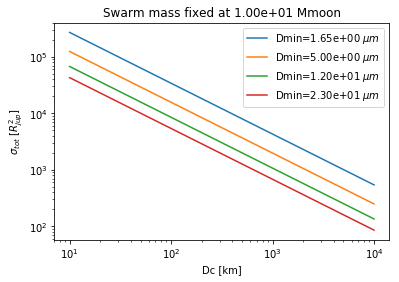

In [10]:
A0165 = []
A0500 = []
A1200 = []
A2300 = []

for i in range(len(Dc)):
    A0165.append(dc_to_sig(Mtot10, rho, Dc[i], Dmin0165))
    A0500.append(dc_to_sig(Mtot10, rho, Dc[i], Dmin0500))
    A1200.append(dc_to_sig(Mtot10, rho, Dc[i], Dmin1200))
    A2300.append(dc_to_sig(Mtot10, rho, Dc[i], Dmin2300))
    

plt.figure(1)
plt.loglog(Dc/1000, A0165, label="Dmin={0:.2e}".format(Dmin0165/1e-6)+r" $\mu m$")
plt.loglog(Dc/1000, A0500, label="Dmin={0:.2e}".format(Dmin0500/1e-6)+r" $\mu m$")
plt.loglog(Dc/1000, A1200, label="Dmin={0:.2e}".format(Dmin1200/1e-6)+r" $\mu m$")
plt.loglog(Dc/1000, A2300, label="Dmin={0:.2e}".format(Dmin2300/1e-6)+r" $\mu m$")
plt.xlabel("Dc [km]")
plt.ylabel(r"$\sigma_{tot}$ [$R_{jup}^2$]")
plt.title("Swarm mass fixed at {0:.2e}".format(Mtot10)+" Mmoon")
plt.legend()
plt.show()

#### $CR$ equation relationship

In [11]:
Msun = 2e30

Q = 0.08
g = 0.32
eta = 0.4
CR = 1e-6
Mpl = 1 # 1 Jup
dpl = 30 # pc

Mstar = linspace(7.5/100., 60/100, 500)

In [12]:
def Smass_to_dmin(fMstar, frho, feta, fMplt):
    return max(2.07e4 * 1e-6 * (fMstar)**(10./3.) * frho**(-1) * (feta/0.5)**(1./2.) * (fMplt)**(-1./3.), 1.65e-6)

In [13]:
def cr_to_sig(fCR, fapl, fg, fQ):
    return pi * fCR * (fapl/pi)**2 / (2.20e-8 * (fg/0.31) * (fQ/0.1))

In [28]:
def sig_to_cr(fsig, fapl, fg, fQ, fMplt, fMstar, cap=False):
    if cap:
        fMplt = fMplt * Mjup
        fMstar = fMstar * Msun
        RH = fapl * (fMplt / (3*fMstar)) ** (1./3.)
        RH = RH * AU / (pi * Rjup)
        AH = pi * RH**2
        fsig = array([a if a <= AH else AH for a in fsig])
    return (2.20e-8 * fsig * (g/0.31) * (Q/0.1)) / (pi * (fapl/pi)**2)

In [15]:
def dmin_to_sig(fMtot, frho, fdc, fdmin):
    return fMtot * pi / (6.9e-8 * frho * fdc**0.9 * fdmin**0.7)

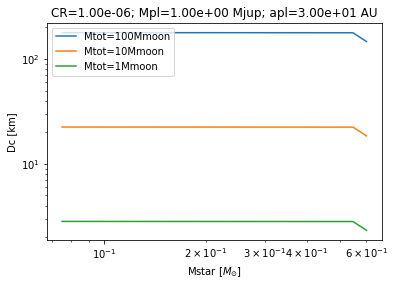

In [16]:
Dmin_list = []
# First get dmin from star mass
for i in range(len(Mstar)):
    Dmin_list.append(Smass_to_dmin(Mstar[i], rho, eta, Mpl))

# Then get area from semi-major axis and contrast ratio
cr = 1e-6
apl = 30 
sig = cr_to_sig(cr, apl, g, Q)
    
Dc100 = []
Dc10 = []
Dc1 = []
# Get dc from dmin
for i in range(len(Dmin_list)):
    Dc100.append(dmin_to_dc(Mtot100, rho, sig, Dmin_list[i])/ 1000)
    Dc10.append(dmin_to_dc(Mtot10, rho, sig, Dmin_list[i]) / 1000)
    Dc1.append(dmin_to_dc(Mtot1, rho, sig, Dmin_list[i]) / 1000)

    
plt.figure(1)
plt.loglog(Mstar, Dc100, label="Mtot=100Mmoon")
plt.loglog(Mstar, Dc10, label="Mtot=10Mmoon")
plt.loglog(Mstar, Dc1, label="Mtot=1Mmoon")
plt.xlabel(r"Mstar [$M_{\odot}$]")
plt.ylabel("Dc [km]")
plt.title("CR={0:.2e}".format(CR)+"; Mpl={0:.2e}".format(Mpl)+" Mjup;"+" apl={0:.2e}".format(apl)+" AU")
plt.legend()
plt.show()

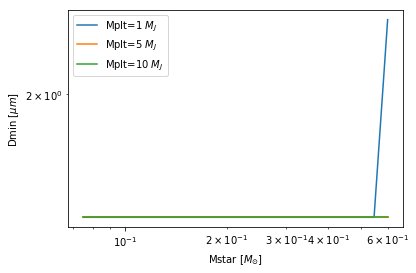

In [17]:
Mpl1 = 1
Mpl5 = 5
Mpl10 = 10

Dmin1 = []
Dmin5 = []
Dmin10 = []
for i in range(len(Mstar)):
    Dmin1.append(Smass_to_dmin(Mstar[i], rho, eta, Mpl1)*1e6)
    Dmin5.append(Smass_to_dmin(Mstar[i], rho, eta, Mpl5)*1e6)
    Dmin10.append(Smass_to_dmin(Mstar[i], rho, eta, Mpl10)*1e6)
    
plt.figure(1)
plt.loglog(Mstar, Dmin1, label=r"Mplt=1 $M_{J}$")
plt.loglog(Mstar, Dmin5, label=r"Mplt=5 $M_{J}$")
plt.loglog(Mstar, Dmin10, label=r"Mplt=10 $M_{J}$")
plt.xlabel(r"Mstar [$M_{\odot}$]")
plt.ylabel(r"Dmin [$\mu m$]")
plt.legend()
plt.show()

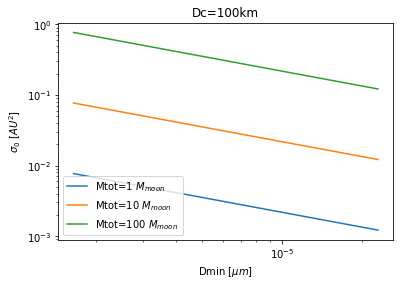

In [18]:
sig1 = []
sig10 = []
sig100 = []

for i in range(len(Dmin)):
    sig1.append(dmin_to_sig(Mtot1, rho, 1e5, Dmin[i]))
    sig10.append(dmin_to_sig(Mtot10, rho, 1e5, Dmin[i]))
    sig100.append(dmin_to_sig(Mtot100, rho, 1e5, Dmin[i]))
    
plt.figure(1)
plt.loglog(Dmin, array(sig1) * pi * Rjup**2 / AU**2, label=r"Mtot=1 $M_{moon}$")
plt.loglog(Dmin, array(sig10) * pi * Rjup**2 / AU**2, label=r"Mtot=10 $M_{moon}$")
plt.loglog(Dmin, array(sig100) * pi * Rjup**2 / AU**2, label=r"Mtot=100 $M_{moon}$")
plt.xlabel(r"Dmin [$\mu m$]")
plt.ylabel(r"$\sigma_0$ [$AU^2$]")
plt.title("Dc=100km")
plt.legend()
plt.show()

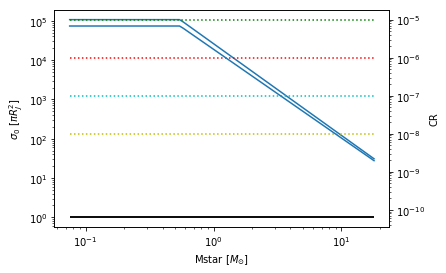

In [31]:
Mstar = linspace(7.5/100., 18., 500)
dc100 = 1e5
apl = 30

# find Dmin from Mstar
dmin = []
for i in range(len(Mstar)):
    dmin.append(Smass_to_dmin(Mstar[i], rho, eta, Mpl1))

# find the swarm area from dmin
sig = dmin_to_sig(Mtot10, rho, dc100, array(dmin))

# convert the area into contrast ratio
cr = []
for i in range(len(Mstar)):
    cr.append(sig_to_cr([sig[i]], apl, g, Q, Mpl1, Mstar[i], cap=True))

# find jupiter cr (sig=1)
cr_j = sig_to_cr([1], apl, g, Q, Mpl1, 1, cap=True)

# Fix some CR
CR_lst = [1e-5, 1e-6, 1e-7, 1e-8]

fig, ax1 = plt.subplots()

ax1.loglog(Mstar, sig)
ax1.set_ylabel(r"$\sigma_0$ [$\pi R_J^2$]")
ax1.hlines(1, Mstar[0], Mstar[-1])


ax2 = ax1.twinx()
ax2.loglog(Mstar, cr)
ax2.set_ylabel("CR")
ax2.hlines(cr_j, Mstar[0], Mstar[-1])
colors = ['g', 'r', 'c', 'y']
for i in range(len(CR_lst)):
    ax2.hlines(CR_lst[i], Mstar[0], Mstar[-1], colors=colors[i], linestyles='dotted')


ax1.set_xlabel(r"Mstar [$M_{\odot}$]")
plt.show()

### Collision rate analysis

In [20]:
def apl_to_rcc(fSmass, fMtot, frho, fdc, feta, fapl, fMpl):
    return 1.917e11 * fSmass**1.38 * fMtot * frho**(-1.63) * fdc**(-1.79) * feta**(-4.13) * fapl**(-4.13) * fMpl**(-0.24)

In [21]:
def G(ft, ftcol):
    return 1 / (1 + ft/ftcol)

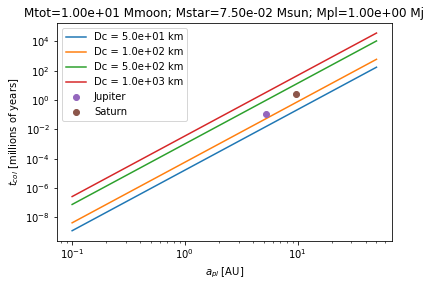

In [33]:
apl = linspace(.1, 50, 500) # AU
Mtot = 10 # Mmoon
Mstar = 7.5/100 # Msun
Dc = [5e4, 1e5, 5e5, 1e6] # m
Mpl = 1 # Mj

rcc_list = []
for i in range(len(Dc)):
    rcc_list.append(apl_to_rcc(Mstar, Mtot, rho, Dc[i], eta, apl, Mpl))

jup = apl_to_rcc(Mstar, Mtot, rho, 1.5e5, eta, 5.2, Mpl)
sat = apl_to_rcc(Mstar, Mtot, rho, 2.5e5, eta, 9.6, 0.3)

plt.figure(1)
for i in range(len(Dc)):
    plt.loglog(apl, 1./rcc_list[i] /1e6, label="Dc = {0:.1e} km".format(Dc[i]/1000))
plt.plot(5.2, 1./jup / 1e6, 'o', label="Jupiter")
plt.plot(9.6, 1./sat / 1e6, 'o', label="Saturn")
plt.xlabel(r"$a_{pl}$ [AU]")
plt.ylabel(r"$t_{col}$ [millions of years]")
plt.title("Mtot={0:.2e} Mmoon;".format(Mtot)+" Mstar={0:.2e} Msun;".format(Mstar)+" Mpl={0:.2e} Mj".format(Mpl))
plt.legend()
plt.show()

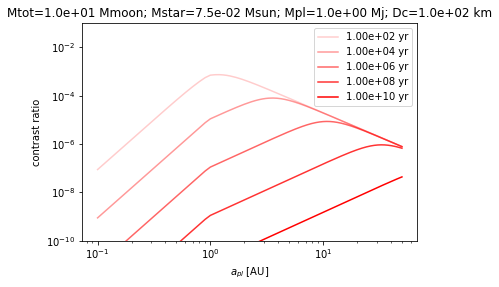

In [36]:
t = [1e2, 1e4, 1e6, 1e8, 1e10]
dc = 1e5
G_list = []
# Find corresponding G(t)
for i in range(len(t)):
    G_list.append(G(t[i], 1./apl_to_rcc(Mstar, Mtot, rho, dc, eta, apl, Mpl)))

# find coresponding dmin
dmin = Smass_to_dmin(Mstar, rho, eta, Mpl)

# find coresponding area
sig = dc_to_sig(Mtot, rho, dc, dmin)

# find coresponding CR
CR = []
for i in range(len(apl)):
    CR.append(sig_to_cr([sig], apl[i], g, Q, Mpl, Mstar, cap=True))

# Correct CR with G(t) factor
cr_correction = []
for i in range(len(G_list)):
    temp = []
    for j in range(len(G_list[i])):
        temp.append(G_list[i][j]*CR[j])
    cr_correction.append(temp)

plt.figure(1)
for i in range(len(cr_correction)):
    plt.loglog(apl, cr_correction[i], color='r', alpha=i/len(cr_correction)+0.2, label="{0:.2e} yr".format(t[i]))

plt.xlabel("")
plt.legend()
plt.ylim([1e-10, 1e-1])
plt.xlabel(r"$a_{pl}$ [AU]")
plt.ylabel("contrast ratio")
plt.title("Mtot={0:.1e} Mmoon;".format(Mtot)+" Mstar={0:.1e} Msun;".format(Mstar)+" Mpl={0:.1e} Mj;".format(Mpl)+" Dc={0:.1e} km".format(dc/1000))
plt.show()